In [2]:
# Import Libaries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Data sets These are both Data sets from Kaggle
df_2019 = pd.read_csv("AB_NYC_2019.csv")
df_2024 = pd.read_csv("new_york_listings_2024.csv")

In [4]:
df_2019.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df_2024.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [6]:
# Removing columns last_review and reviews_per_month
df_2019 = df_2019.drop("last_review", axis=1)
df_2019 = df_2019.drop("reviews_per_month", axis=1)

In [7]:
df_2019.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [8]:
# drops all remaning null rows.
df_2019.dropna(inplace=True)

In [9]:
df_2019.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
# Aggregation summaries for both data sets.
sum_2019 = df_2019.groupby("neighbourhood_group").agg(
    listing_19 = ("id", "count"),
    avg_price_19 = ("price", "mean"),
    avg_availability_19 = ("availability_365", "mean")
).reset_index()

sum_2024 = df_2024.groupby("neighbourhood_group").agg(
    listing_24 = ("id", "count"),
    avg_price_24 = ("price", "mean"),
    avg_availability_24 = ("availability_365", "mean")
).reset_index()

In [11]:
# Combines summaries of both years.
comb_df = pd.merge(sum_2019, sum_2024, on = "neighbourhood_group")
comb_df = comb_df.round(2)

In [12]:
display(comb_df)

,neighbourhood_group,listing_19,avg_price_19,avg_availability_19,listing_24,avg_price_24,avg_availability_24
0,Bronx,1089,87.47,165.70,949,118.41,237.59
1,Brooklyn,20089,124.41,100.24,7719,187.03,200.24
2,Manhattan,21643,196.90,112.01,8038,227.85,203.92
3,Queens,5664,99.54,144.49,3761,126.49,212.21
4,Staten Island,373,114.81,199.68,291,118.78,232.35


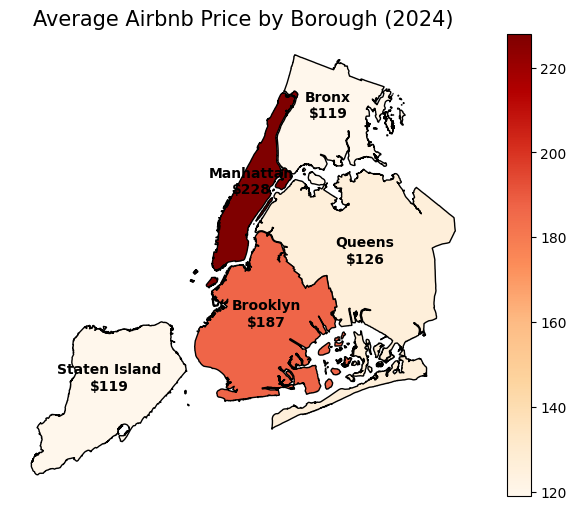

In [13]:
gdf = gpd.read_file("nybb.shp") 

data = {
    "borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"],
    "price_2024": [228, 187, 126, 119, 119]
}

df = pd.DataFrame(data)

gdf = gdf.rename(columns={"BoroName": "borough"})
merged = gdf.merge(df, on="borough")

fig, ax = plt.subplots(figsize=(8, 6))


merged.plot(column="price_2024", cmap="OrRd", legend=True, ax=ax, edgecolor="black")
for idx, row in merged.iterrows():
    plt.annotate(
        text=f"{row["borough"]}\n${row["price_2024"]}",
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha="center",
        fontsize=10,
        weight="bold",
        color="black"
    )
plt.title("Average Airbnb Price by Borough (2024)", fontsize=15)
plt.axis("off")
plt.show()

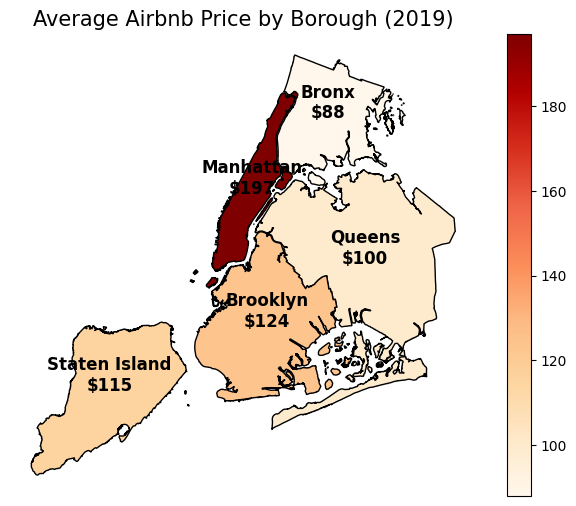

In [14]:
gdf = gpd.read_file("nybb.shp") 

data = {
    "borough": ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"],
    "price_2019": [197, 124, 100, 88, 115]
}
df = pd.DataFrame(data)

gdf = gdf.rename(columns={"BoroName": "borough"})
merged = gdf.merge(df, on="borough")

fig, ax = plt.subplots(figsize=(8, 6))
merged.plot(column="price_2019", cmap="OrRd", legend=True, ax=ax, edgecolor="black")
for idx, row in merged.iterrows():
    plt.annotate(
        text=f"{row["borough"]}\n${row["price_2019"]}",
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment="center",
        fontsize=12,
        weight="bold"
    )
    
plt.title("Average Airbnb Price by Borough (2019)", fontsize=15)
plt.axis("off")
plt.show()

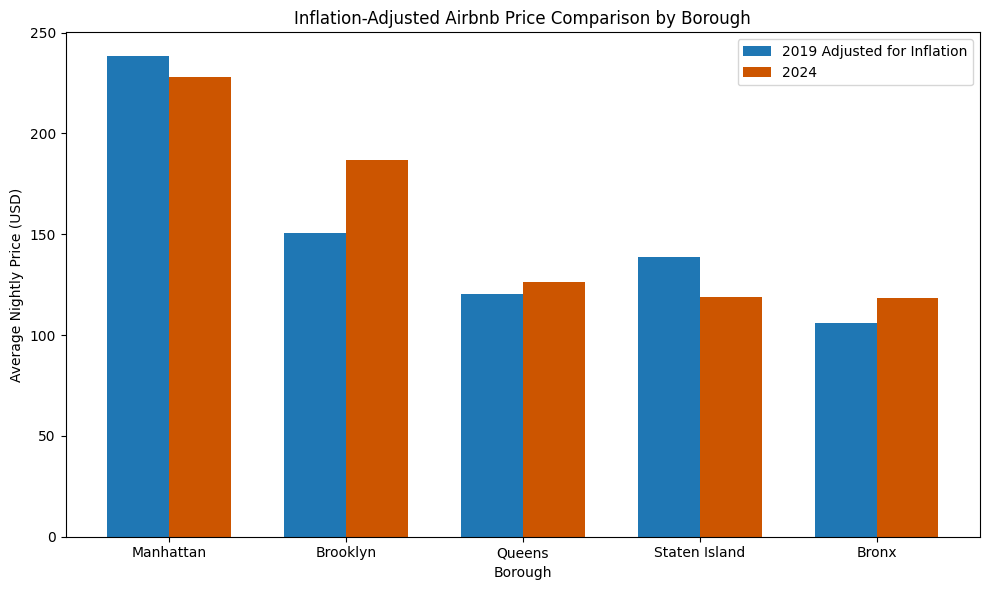

In [27]:

df_2019 = df_2019.rename(columns={"neighbourhood_group": "borough"})
df_2024 = df_2024.rename(columns={"neighbourhood_group": "borough"})
df_2019_filtered = df_2019[["borough", "price"]]
df_2024_filtered = df_2024[["borough", "price"]]
df_2019_filtered = df_2019_filtered[df_2019_filtered["price"] > 0]
df_2024_filtered = df_2024_filtered[df_2024_filtered["price"] > 0]
df_2019_filtered["adjusted_price"] = df_2019_filtered["price"] * 1.21
df_2024_filtered["adjusted_price"] = df_2024_filtered["price"]
avg_2019 = df_2019_filtered.groupby("borough")["adjusted_price"].mean().reset_index()
avg_2024 = df_2024_filtered.groupby("borough")["adjusted_price"].mean().reset_index()
avg_2019.rename(columns={"adjusted_price": "2019 Adjusted Price"}, inplace=True)
avg_2024.rename(columns={"adjusted_price": "2024 Price"}, inplace=True)
comparison = pd.merge(avg_2019, avg_2024, on="borough")
comparison = comparison.sort_values(by="2024 Price", ascending=False).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(comparison))
ax.bar(index, comparison["2019 Adjusted Price"], bar_width, label="2019 Adjusted for Inflation")
ax.bar([i + bar_width for i in index], comparison["2024 Price"], bar_width, label="2024", color="#CC5500")
ax.set_xlabel("Borough")
ax.set_ylabel("Average Nightly Price (USD)")
ax.set_title("Inflation-Adjusted Airbnb Price Comparison by Borough")
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(comparison["borough"])
ax.legend()
plt.tight_layout()
plt.show()